In [22]:
import pandas as pd

data = pd.read_csv("./step_delay_mapping.csv")
data

,participant,abs_seq,start,end,duration,delay,block,block_seq,exec_time
0,134146,0,2019-11-15 19:19:22.728000+00:00,2019-11-15 19:19:27.019000+00:00,0 days 00:00:04.291000,0 days 00:00:00,0,0,0 days 00:00:03.029000
1,134146,1,2019-11-15 19:19:27.019000+00:00,2019-11-15 19:19:32.013000+00:00,0 days 00:00:04.994000,0 days 00:00:00,1,0,0 days 00:00:04.004000
2,134146,2,2019-11-15 19:19:32.013000+00:00,2019-11-15 19:19:35.520000+00:00,0 days 00:00:03.507000,0 days 00:00:00,1,1,0 days 00:00:02.625000
3,134146,3,2019-11-15 19:19:35.520000+00:00,2019-11-15 19:19:41.515000+00:00,0 days 00:00:05.995000,0 days 00:00:00,1,2,0 days 00:00:04.680000
4,134146,4,2019-11-15 19:19:41.515000+00:00,2019-11-15 19:19:47.301000+00:00,0 days 00:00:05.786000,0 days 00:00:00,1,3,0 days 00:00:05.197000
...,...,...,...,...,...,...,...,...,...
6755,137353,164,2019-11-26 18:59:22.272000+00:00,2019-11-26 18:59:29.299000+00:00,0 days 00:00:07.027000,0 days 00:00:00,21,7,0 days 00:00:06.358000
6756,137353,165,2019-11-26 18:59:29.299000+00:00,2019-11-26 18:59:34.517000+00:00,0 days 00:00:05.218000,0 days 00:00:00,21,8,0 days 00:00:03.840000
6757,137353,166,2019-11-26 18:59:34.517000+00:00,2019-11-26 18:59:38.547000+00:00,0 days 00:00:04.030000,0 days 00:00:00,21,9,0 days 00:00:02.932000
6758,137353,167,2019-11-26 18:59:38.547000+00:00,2019-11-26 18:59:41.454000+00:00,0 days 00:00:02.907000,0 days 00:00:00,21,10,0 days 00:00:01.874000


In [23]:
data = data.drop(columns=["start", "end", "duration"], errors="ignore")
data["participant"] = data["participant"].astype("category")
data["delay"] = pd.to_timedelta(data["delay"]).dt.total_seconds()
data["exec_time"] = pd.to_timedelta(data["exec_time"]).dt.total_seconds()
data

,participant,abs_seq,delay,block,block_seq,exec_time
0,134146,0,0.0,0,0,3.029
1,134146,1,0.0,1,0,4.004
2,134146,2,0.0,1,1,2.625
3,134146,3,0.0,1,2,4.680
4,134146,4,0.0,1,3,5.197
...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358
6756,137353,165,0.0,21,8,3.840
6757,137353,166,0.0,21,9,2.932
6758,137353,167,0.0,21,10,1.874


In [24]:
data["ttf"] = 1.5 * data["delay"]
data

,participant,abs_seq,delay,block,block_seq,exec_time,ttf
0,134146,0,0.0,0,0,3.029,0.0
1,134146,1,0.0,1,0,4.004,0.0
2,134146,2,0.0,1,1,2.625,0.0
3,134146,3,0.0,1,2,4.680,0.0
4,134146,4,0.0,1,3,5.197,0.0
...,...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358,0.0
6756,137353,165,0.0,21,8,3.840,0.0
6757,137353,166,0.0,21,9,2.932,0.0
6758,137353,167,0.0,21,10,1.874,0.0


In [27]:
data["duration"] = data["block_seq"].map(lambda seq: "1-4" if seq < 4 else "5-8" if seq < 8 else ">8").astype("category")
data

,participant,abs_seq,delay,block,block_seq,exec_time,ttf,duration
0,134146,0,0.0,0,0,3.029,0.0,1-4
1,134146,1,0.0,1,0,4.004,0.0,1-4
2,134146,2,0.0,1,1,2.625,0.0,1-4
3,134146,3,0.0,1,2,4.680,0.0,1-4
4,134146,4,0.0,1,3,5.197,0.0,1-4
...,...,...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358,0.0,5-8
6756,137353,165,0.0,21,8,3.840,0.0,>8
6757,137353,166,0.0,21,9,2.932,0.0,>8
6758,137353,167,0.0,21,10,1.874,0.0,>8


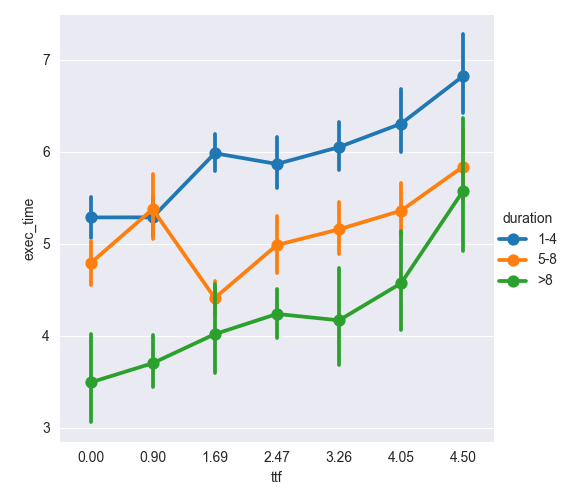

/var/folders/v3/rwb_fz_54x920ydszrlcxw1m0000gn/T/ipykernel_35406/1565398174.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_per_duration = data.groupby(["duration", "ttf"])["exec_time"].mean()


duration  ttf   
1-4       0.0000    5.286644
          0.9000    5.287467
          1.6875    5.984215
          2.4750    5.867358
          3.2625    6.050854
          4.0500    6.305729
          4.5000    6.824465
5-8       0.0000    4.788984
          0.9000    5.376425
          1.6875    4.410344
          2.4750    4.986813
          3.2625    5.157150
          4.0500    5.360025
          4.5000    5.839731
>8        0.0000    3.493400
          0.9000    3.702131
          1.6875    4.018288
          2.4750    4.237812
          3.2625    4.168450
          4.0500    4.571450
          4.5000    5.577256
Name: exec_time, dtype: float64

In [45]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np

ttfs = np.sort(data["ttf"].unique())

fg = sns.catplot(data=data, x="ttf", y="exec_time", hue="duration", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

means_per_duration = data.groupby(["duration", "ttf"])["exec_time"].mean()
means_per_duration